# Data visualization for machine learning in python

 <b>This notebook goes over some common data visualization methods that will be useful for machine learning students.</b>

    -Train vs. Test accuracy plot 
    -Correlation between classifiers
    -Misclassified Samples Table
    -Image Visualization
    -Feature Importances
    -Confusion Matrix


In [1]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

## Train versus Test Graph

While we learn about the different models, we will begin to tune their unique parameters in order to minimize over/underfitting
One way to do this is to analyze the Train vs Test scores as we vary the parameter.
This section illustrates how to generate one such plot while varying the n_neighbors parameter for KNN on the breast cancer dataset

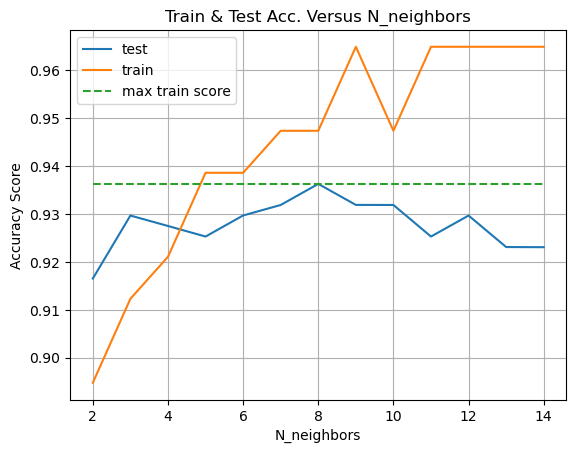

In [3]:
knn_train_scores, knn_test_scores = [], [] #list to store the scores. This list will serve as the y-values in our plot
n_neighbors = [n for n in range(2,15)] #list of the parameters range that we are going to vary. This will be our x-axis
for n in n_neighbors:
    knn  = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    knn_train = np.mean(cross_val_score(knn, X_train, y_train, cv=3))
    knn_preds = knn.predict(X_test)
    knn_test = accuracy_score(knn_preds, y_test)
    
    knn_train_scores.append(knn_train) #adding our scores to the list that will be used for the plot
    knn_test_scores.append(knn_test)
    
max_train_score = np.max(knn_train_scores) #finding the peak train score to be plotted as a dashed line later


plt.plot(n_neighbors, knn_train_scores) #plt.plot will create a graph, taking a list of x values and list of y values
plt.plot(n_neighbors, knn_test_scores)
plt.plot(n_neighbors, [max_train_score] * len(n_neighbors), linestyle="dashed") #creating a dashed line accross showing max train score
plt.title("Train & Test Acc. Versus N_neighbors") #title
plt.xlabel("N_neighbors") #axis label
plt.ylabel("Accuracy Score")
plt.grid(True)
plt.legend(["test", "train", "max train score"])
plt.show()
    

In [4]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print(f"Train Score KNN {np.mean(cross_val_score(knn, X_train, y_train, cv=3))}")

knn_preds = knn.predict(X_test)
print(f"Test Score KNN: {np.mean(accuracy_score(knn_preds, y_test))}")

Train Score KNN 0.9318723132334147
Test Score KNN: 0.9473684210526315


In [5]:
svm  = SVC(kernel='linear')
svm.fit(X_train,y_train)
print(f"Train Score SVM :{np.mean(cross_val_score(svm, X_train, y_train, cv=3))}")

svm_preds = svm.predict(X_test)
print(f"Test Score SVM :{accuracy_score(svm_preds, y_test)}")

Train Score SVM :0.9384803067270825
Test Score SVM :0.956140350877193


In [6]:
tree  = DecisionTreeClassifier(max_depth = 4) 
tree.fit(X_train,y_train)
print(f"Train Score Decision Tree :{np.mean(cross_val_score(tree, X_train, y_train, cv=3))}")

tree_preds = tree.predict(X_test)
print(f"Test Score Decision Tree :{accuracy_score(tree_preds, y_test)}")

Train Score Decision Tree :0.9032764029278494
Test Score Decision Tree :0.956140350877193


## Correlation Between Classifiers
In machine learning, sometimes we need to compare classifers to one another. When you learn ensemble methods, it will be useful to know how diverse a set of classifiers are. One way to do this is with a correlation matrix. In this section we show how to create a correlation matrix to compare the predictions of three classifiers on the breast cancer dataset

In [7]:
predictions_df = pd.DataFrame({
    'True Label': y_test,
    'KNN': knn_preds,
    'SVM': svm_preds,
    'Decision Tree': tree_preds
})

In [8]:
correlation_matrix = (predictions_df.drop("True Label", axis="columns")).corr()
print(correlation_matrix)


                    KNN       SVM  Decision Tree
KNN            1.000000  0.911669       0.909357
SVM            0.911669  1.000000       0.930528
Decision Tree  0.909357  0.930528       1.000000


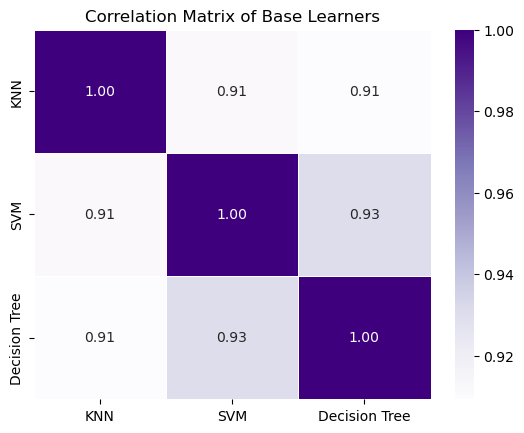

In [9]:
#Plotting a heatmap which shows the correlation between two classifiers (this can become important when we learn ensemble methods)
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Base Learners')
plt.show()

## Misclassified Samples Table
In machine learning, we often need to identify misclassified samples i.e. those where the model made an incorrect prediction. Once these samples are identified, further analysis can be done to discover the root cause based on the nature of the problem. In this section we create a table to be displayed in the notebook highlighting those samples where a model made an incorrect prediction

In [10]:
from IPython.display import display, HTML
pd.set_option('display.max_rows', None)

# Define a function to highlight cells when they don't match the true value
def highlight_mismatch(value, true_value):
    return 'background-color: #ffcccb' if value != true_value else ''

# Apply the styling to the DataFrame
styled_df = predictions_df.style.apply(lambda row: [highlight_mismatch(value, row['True Label']) for value in row], axis=1)


display(styled_df)

,True Label,KNN,SVM,Decision Tree
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,1,1,1,1
9,1,1,1,1


## Image Visualization
A common way to represent image data is by using the individual pixel intensities as features. In order to visualize this data, we can create a grid of those pixels. In this section we show two cases, one in which the data for a 64 bit image is already shaped into an 8x8 pair of values, and the second where we manually reshape the 64 features

## Digits data with shape (1797, 8, 8)

(1797, 8, 8)
1,797 64-bit images (8x8)


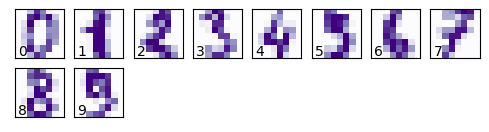

In [11]:
from sklearn.datasets import load_digits

digits = load_digits() #dataset containing images with pixel data as features
print(digits.images.shape)
print("1,797 64-bit images (8x8)") #note here when we print images.shape we see shape (1,797, 8, 8). 
                                   #The 8, 8 is showing our 64bit image has already been shaped into an 8x8 grid
    
fig = plt.figure(figsize=(6, 6))  # figure size 6x6in.
for i in range(10):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[]) #add_subplot takes (nrows, ncols, index). xticks and yticks = [] removes ticks from the axes
    ax.imshow(digits.images[i], cmap="Purples")
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


## Digits data with shape (1797, 64)

(1797, 64)
64 features must be reshaped into 8x8 image


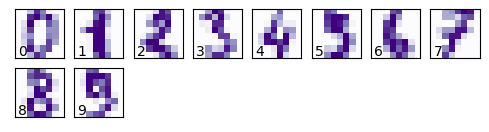

In [12]:
fig = plt.figure(figsize=(6, 6))  # figure size 6x6in.
data=digits['data']
target=digits['target']
names=digits['feature_names']
print(data.shape)
print("64 features must be reshaped into 8x8 image")
#Sometimes, our data will not already be shaped into a grid, instead here in shape we see (1797, 64). We can reshape this using data[i].reshape as seen below 

for i in range(10):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[]) #add_subplot takes (nrows, ncols, index). xticks and yticks = [] removes ticks from the axes
    ax.imshow(data[i].reshape(8,8), cmap="Purples") #here we call .reshape(8,8)
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Feature Importances
Certain models have their features importances attribute set after they are fitted. The feature importances can provide insight into which features are influential, and can prompt experimentation into using a different subset of features to improve the models performance. In this section we create a bar graph showing the top 30 features in a decision tree trained on the digits dataset

DT train score: 0.8440979955456571
DT test score: 0.8511111111111112


<AxesSubplot:title={'center':'DT Feature Importances'}>

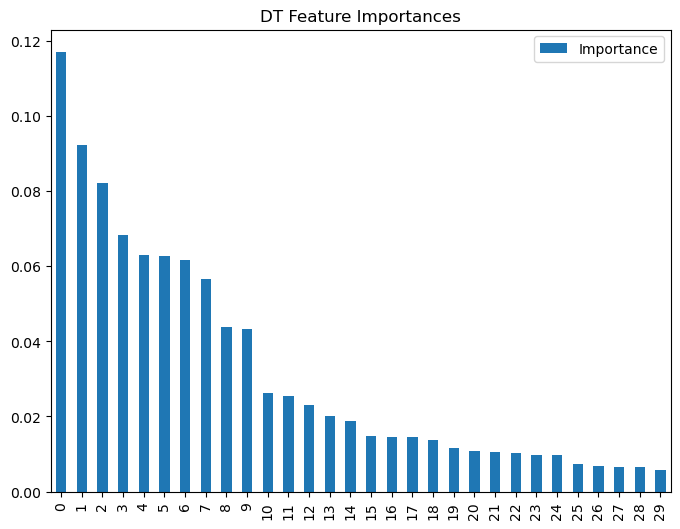

In [13]:
X=pd.DataFrame(data,columns=names)
y=pd.DataFrame(target,columns=['Target'])

X_train, X_test, y_train, y_test, =train_test_split(X,y,random_state = 0)

tree = DecisionTreeClassifier(max_depth = 40) #training a dt classifier ()
tree.fit(X_train, y_train['Target'])
tree_preds = tree.predict(X_test)
print(f"DT train score: {np.mean(cross_val_score(tree, X_train, y_train, cv=3))}")
print(f"DT test score: {accuracy_score(tree_preds, y_test)}")

tree_features = sorted(tree.feature_importances_, reverse=True)[:30] #sorting the features and keeping top 30
dt_plot = pd.DataFrame(tree_features, columns=["Importance"]) #creating dataframe from sorted features
dt_plot.plot(kind='bar', figsize=(8,6), title="DT Feature Importances")


## Confusion Matrix
A confusion matrix is a table that is often used to evaluate the performance of a classification algorithm on a set of test data for which the true values are known. It is particularly useful for understanding the performance of a machine learning model in terms of its ability to correctly or incorrectly classify instances into different classes. In this section, we create a heatmap of the confusion matrix to visualize the models confidence in predicting each of the classes in the digits dataset

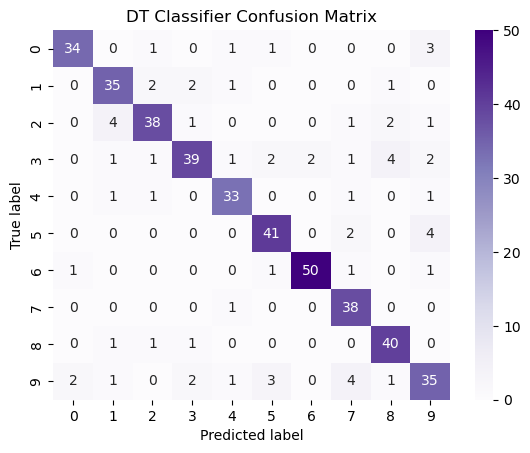

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(tree_preds, y_test['Target'])
sns.heatmap(cm, annot=True, cmap = 'Purples')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("DT Classifier Confusion Matrix")
plt.show()

<i>Mohammad Zaidi, 2023</i>